In [23]:
from fastai.collab import *
from fastai.tabular import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('C:\\Users\\MAYANK PUVVALA\\Downloads\\jupyter\\songsDataset.csv')
df.head()

,'userID','songID','rating'
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5


In [24]:
df.shape

(2000000, 3)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   'userID'  int64
 1   'songID'  int64
 2   'rating'  int64
dtypes: int64(3)
memory usage: 45.8 MB


In [26]:
features=df.iloc[:,: -1]
predictions=df.iloc[:,-1]
features.head()

,'userID','songID'
0,0,7171
1,0,8637
2,0,21966
3,0,35821
4,0,82446


In [27]:
predictions.head()

0    5
1    4
2    4
3    5
4    5
Name: 'rating', dtype: int64

In [28]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,predictions,test_size=0.2,random_state=0,shuffle=True)

In [29]:
Train_data= pd.concat([X_train,y_train], axis='columns')
Train_data

,'userID','songID','rating'
608812,60881,54405,4
623729,62372,136593,5
583106,58310,64973,3
435735,43573,84361,3
1361953,136195,75168,5
...,...,...,...
152315,15231,83230,3
963395,96339,92718,5
117952,11795,37046,1
1484405,148440,75128,1


In [30]:
Train_data.describe()

,'userID','songID','rating'
count,1.600000e+06,1.600000e+06,1.600000e+06
mean,1.000253e+05,6.798402e+04,3.459217e+00
std,5.775019e+04,3.939809e+04,1.553657e+00
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.001000e+04,3.423875e+04,2.000000e+00
50%,1.000490e+05,6.775500e+04,4.000000e+00
75%,1.500440e+05,1.019480e+05,5.000000e+00
max,1.999990e+05,1.367350e+05,5.000000e+00


In [31]:
corr_mat=Train_data.corr(method='pearson',numeric_only=True)
corr_mat

,'userID','songID','rating'
'userID',1.000000,0.001309,-0.000061
'songID',0.001309,1.000000,-0.003888
'rating',-0.000061,-0.003888,1.000000


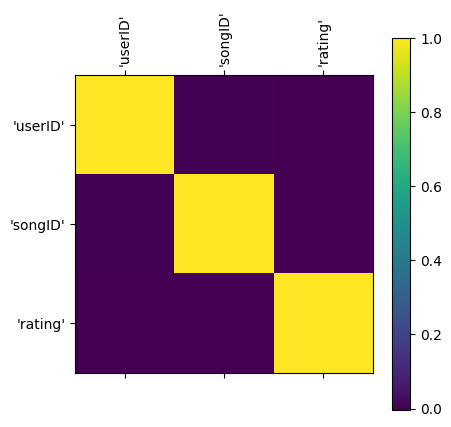

In [32]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)),corr_mat.columns,rotation=90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
plt.colorbar()
plt.show()

In [40]:
import pandas as pd
from surprise import Dataset, Reader
from surprise import KNNBasic
# Load the ratings dataset
ratings = pd.read_csv('C:\\Users\\MAYANK PUVVALA\\Downloads\\jupyter\\songsDataset.csv')

ratings.columns = ['userID', 'songID', 'rating']

# Create a Surprise Dataset object
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userID', 'songID', 'rating']], reader)
# Load your dataset

# Define your similarity options
sim_options = {'name': 'cosine', 'user_based': True}

# Create and train the KNNBasic model
trainset = data.build_full_trainset()
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Now, you can make predictions using the trained model


Computing the cosine similarity matrix...


MemoryError: Unable to allocate 298. GiB for an array with shape (200000, 200000) and data type float64

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
F1_train= f1_score(y_train,y_pred_train,average='weighted')
confusion_mat_train=confusion_matrix(y_train,y_pred_train)
print("evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train,decimals=3))
print("Train Confusion Matrix: ", confusion_mat_train)

F1= f1_score(y_test,y_pred,average='weighted')
confusion_mat=confusion_matrix(y_test,y_pred)
print("Evaluation Metrics: Test Data")
print("Test F1 score: ", np.round(F1,decimals=3))
print("Test Confusion Matrix: ", confusion_mat)
      

In [ ]:
from surprise import Dataset
from surprise import Reader
from surprise import KNNBasic

# Load the ratings dataset
ratings = pd.read_csv('C:\\Users\\MAYANK PUVVALA\\Downloads\\jupyter\\songsDataset.csv')

# Rename the columns to match your dataset
ratings.columns = ['userID', 'songID', 'rating']

# Create a Surprise Dataset object
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userID', 'songID', 'rating']], reader)

# Build a user-based collaborative filtering model
sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(sim_options=sim_options)
trainset = data.build_full_trainset()
model.fit(trainset)

# Function to recommend items to a given user based on collaborative filtering
def recommend_items(user_id, n=5):
    # Get top N recommendations for the given user
    testset = trainset.build_anti_testset()
    testset = filter(lambda x: x[0] == user_id, testset)
    predictions = model.test(testset)
    top_n_recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    # Extract item IDs from recommendations
    recommended_items = [int(item.iid) for item in top_n_recommendations]
    
    return recommended_items

# Example usage:
user_id = 2
recommended_items = recommend_items(user_id)
print(f"Recommended items for User {user_id}: {recommended_items}")

In [33]:
# Import necessary libraries
from fastai.collab import *
from fastai.tabular import *
import pandas as pd

# Load the dataset
ratings = pd.read_csv('C:\\Users\\MAYANK PUVVALA\\Downloads\\jupyter\\songsDataset.csv')

# Define the data
data = CollabDataLoaders.from_df(ratings, user_name='userID', item_name='songID', rating_name='rating', bs=64)

# Create and train the collaborative filtering model
learn = collab_learner(data, n_factors=50, y_range=(0, 10))
learn.fit_one_cycle(5, 5e-3)

# Get recommendations for a specific user
user_id = 1
top_ratings = ratings[ratings['userID'] == user_id].sort_values(by='rating', ascending=False)
top_ratings

# Generate recommendations for the user
user = learn.dls.classes['userID'].o2i[user_id]
recs = learn.get_preds(user)
top_items = ratings['songID'][np.argsort(recs[0], axis=0)[::-1]]
recommended_songs = top_items[~top_items.isin(top_ratings['songID'])][:10]

# Display the recommendations
recommended_songs


KeyError: 'userID'